In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm

import pickle
from scipy import stats

In [2]:
steps = 200
s = np.zeros(steps)
i = np.zeros(steps)
r = np.zeros(steps)

s[0] = 0.999
r[0] = 0
i[0] = 0.001

In [3]:
l = 2.5
nu = 1.0
def systems(s, i, r):
    
    s1 = -l*s*i
    i1 = l*s*i - nu*i
    r1 = nu*i
    
    return s1, i1, r1
    
    
    
    

In [4]:


h = 0.05
th = [0]
for t in range(1, steps):
    ds, di, dr = systems(s[t-1], i[t-1], r[t-1])
    th.append(th[-1]+h)
    s[t] = s[t-1]+h*ds
    i[t] = i[t-1]+h*di
    r[t] = r[t-1]+h*dr
    

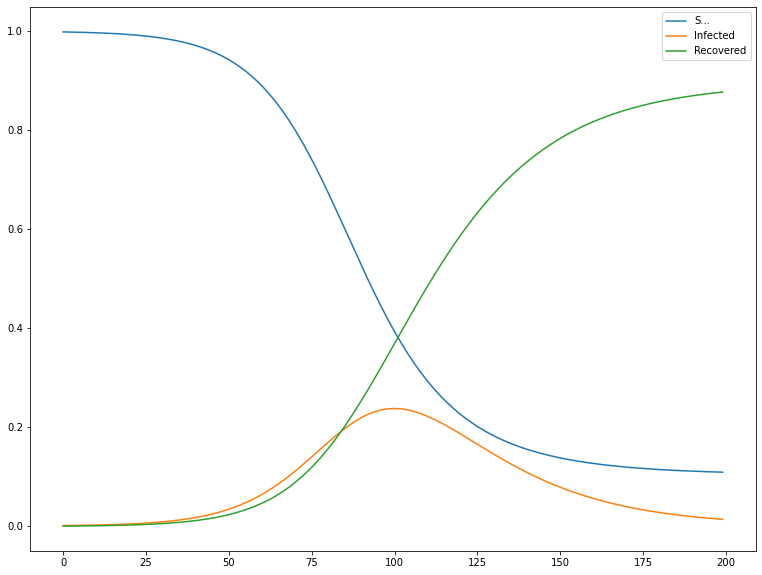

In [5]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.plot(s, label = "S...")

plt.plot(i, label = "Infected")

plt.plot(r, label = "Recovered")
 
plt.legend()

In [6]:
S_ = 999
I_ = 1
R_ = 0

sim_steps = 1500
s_ = np.zeros(sim_steps)
i_ = np.zeros(sim_steps)
r_  = np.zeros(sim_steps)
s_[0] = 999
i_[0] = 1
r_[0] = 0
 
ts = [0]
for t in range(1, sim_steps):
    param = (l*s_[t-1]/1000*i_[t-1]/1000 + nu*i_[t-1]/1000)
    #print(param)
    
    t1 = np.random.exponential( 1/param )   
    ts.append( ts[-1] +t1  )  
    q = np.random.uniform()

    rec = nu*i_[t-1]/1000/param
    
    #print("rec", rec)
 
    if (q < rec ):
        s_[t] = s_[t-1]
        i_[t] = i_[t-1]-1
        r_[t] = r_[t-1]+1
    else:
  
        s_[t] = s_[t-1]-1
        i_[t] = i_[t-1]+1
        r_[t] = r_[t-1]
        
s_ = s_/1000
r_ = r_/1000
i_ = i_/1000



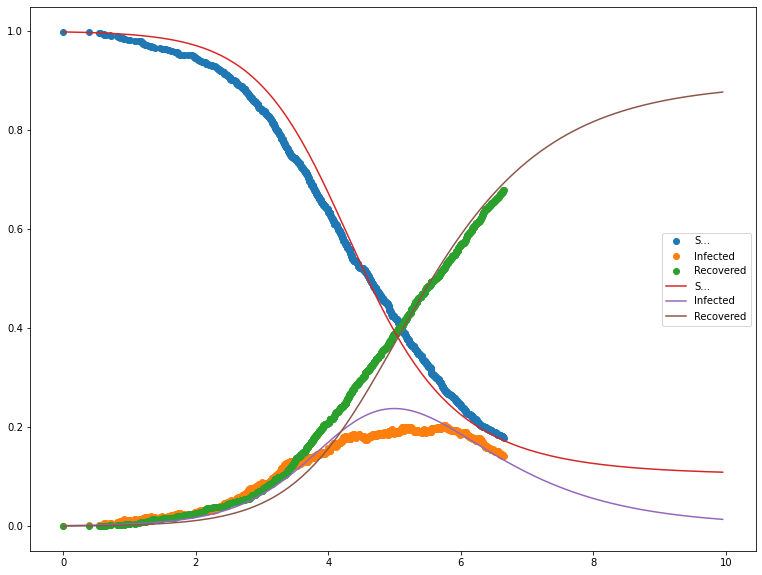

In [7]:
ts = np.array(ts)/1000
th  = np.array(th) 
#ts = ts/ts*np.max(th)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.plot(ts, s_, 'o', label = "S...")

plt.plot(ts, i_,'o', label = "Infected")

plt.plot(ts, r_, 'o', label = "Recovered")

plt.plot(th, s, label = "S...")

plt.plot(th, i, label = "Infected")

plt.plot(th, r, label = "Recovered") 
 
plt.legend()